In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error,mean_squared_error
import seaborn as sns
import missingno as msno
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import lag_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX



In [2]:
air = pd.read_csv("air.csv")

In [3]:
air.head()

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),RH (%),WS (m/s),WD (deg),SR (W/mt2),BP (mmHg),VWS (m/s),Xylene (ug/m3),RF (mm),AT (degree C)
0,2016-07-01 10:00:00,2016-07-01 11:00:00,10.67,39.0,17.67,39.2,32.33,7.07,6.60,0.48,...,33.43,71.67,2.30,226.33,123.67,NaN,-0.1,0.1,0.0,23.05
1,2016-07-01 11:00:00,2016-07-01 12:00:00,2.00,39.0,20.50,41.9,35.80,7.40,NaN,0.49,...,33.70,70.00,2.50,223.00,186.00,NaN,-0.1,0.1,0.0,NaN
2,2016-07-01 12:00:00,2016-07-01 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-01 13:00:00,2016-07-01 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-01 14:00:00,2016-07-01 15:00:00,20.50,50.0,15.40,43.6,32.78,6.35,6.38,0.47,...,33.57,63.50,1.88,223.00,240.50,NaN,-0.1,0.1,0.0,NaN


In [4]:
air.shape

(59150, 23)

In [5]:
air.describe

<bound method NDFrame.describe of                  From Date              To Date  PM2.5 (ug/m3)  PM10 (ug/m3)  \
0      2016-07-01 10:00:00  2016-07-01 11:00:00          10.67         39.00   
1      2016-07-01 11:00:00  2016-07-01 12:00:00           2.00         39.00   
2      2016-07-01 12:00:00  2016-07-01 13:00:00            NaN           NaN   
3      2016-07-01 13:00:00  2016-07-01 14:00:00            NaN           NaN   
4      2016-07-01 14:00:00  2016-07-01 15:00:00          20.50         50.00   
...                    ...                  ...            ...           ...   
59145  2023-03-31 19:00:00  2023-03-31 20:00:00          53.00         70.25   
59146  2023-03-31 20:00:00  2023-03-31 21:00:00          58.50         88.50   
59147  2023-03-31 21:00:00  2023-03-31 22:00:00          44.25         80.50   
59148  2023-03-31 22:00:00  2023-03-31 23:00:00          31.25         59.00   
59149  2023-03-31 23:00:00  2023-04-01 00:00:00          26.00         53.00   

     

In [6]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59150 entries, 0 to 59149
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   From Date        59150 non-null  object 
 1   To Date          59150 non-null  object 
 2   PM2.5 (ug/m3)    54323 non-null  float64
 3   PM10 (ug/m3)     54450 non-null  float64
 4   NO (ug/m3)       55153 non-null  float64
 5   NO2 (ug/m3)      55100 non-null  float64
 6   NOx (ppb)        55315 non-null  float64
 7   NH3 (ug/m3)      53564 non-null  float64
 8   SO2 (ug/m3)      54285 non-null  float64
 9   CO (mg/m3)       54673 non-null  float64
 10  Ozone (ug/m3)    54567 non-null  float64
 11  Benzene (ug/m3)  55213 non-null  float64
 12  Toluene (ug/m3)  55213 non-null  float64
 13  Temp (degree C)  55113 non-null  float64
 14  RH (%)           55281 non-null  float64
 15  WS (m/s)         55299 non-null  float64
 16  WD (deg)         54656 non-null  float64
 17  SR (W/mt2)  

In [7]:
air.isna().sum()


From Date              0
To Date                0
PM2.5 (ug/m3)       4827
PM10 (ug/m3)        4700
NO (ug/m3)          3997
NO2 (ug/m3)         4050
NOx (ppb)           3835
NH3 (ug/m3)         5586
SO2 (ug/m3)         4865
CO (mg/m3)          4477
Ozone (ug/m3)       4583
Benzene (ug/m3)     3937
Toluene (ug/m3)     3937
Temp (degree C)     4037
RH (%)              3869
WS (m/s)            3851
WD (deg)            4494
SR (W/mt2)          4561
BP (mmHg)          57949
VWS (m/s)           3809
Xylene (ug/m3)      3950
RF (mm)             3865
AT (degree C)       4063
dtype: int64

In [8]:
air.isna().mean() * 100


From Date           0.000000
To Date             0.000000
PM2.5 (ug/m3)       8.160609
PM10 (ug/m3)        7.945900
NO (ug/m3)          6.757396
NO2 (ug/m3)         6.846999
NOx (ppb)           6.483516
NH3 (ug/m3)         9.443787
SO2 (ug/m3)         8.224852
CO (mg/m3)          7.568893
Ozone (ug/m3)       7.748098
Benzene (ug/m3)     6.655959
Toluene (ug/m3)     6.655959
Temp (degree C)     6.825021
RH (%)              6.540997
WS (m/s)            6.510566
WD (deg)            7.597633
SR (W/mt2)          7.710904
BP (mmHg)          97.969569
VWS (m/s)           6.439560
Xylene (ug/m3)      6.677937
RF (mm)             6.534235
AT (degree C)       6.868977
dtype: float64

In [9]:
# Vorwärtsauffüllen
air.ffill(inplace=True)


In [10]:
# Überprüfen, ob es noch NaN-Werte gibt
air.isna().sum()


From Date             0
To Date               0
PM2.5 (ug/m3)         0
PM10 (ug/m3)          0
NO (ug/m3)            0
NO2 (ug/m3)           0
NOx (ppb)             0
NH3 (ug/m3)           0
SO2 (ug/m3)           0
CO (mg/m3)            0
Ozone (ug/m3)         0
Benzene (ug/m3)       0
Toluene (ug/m3)       0
Temp (degree C)       0
RH (%)                0
WS (m/s)              0
WD (deg)              0
SR (W/mt2)            0
BP (mmHg)          5482
VWS (m/s)             0
Xylene (ug/m3)        0
RF (mm)               0
AT (degree C)         0
dtype: int64

In [11]:
# Convert column to datetime
air['From Date'] = pd.to_datetime(air['From Date'])

# Set as index
air.set_index('From Date', inplace=True)

In [12]:
# Now it will work
air['hour'] = air.index.hour

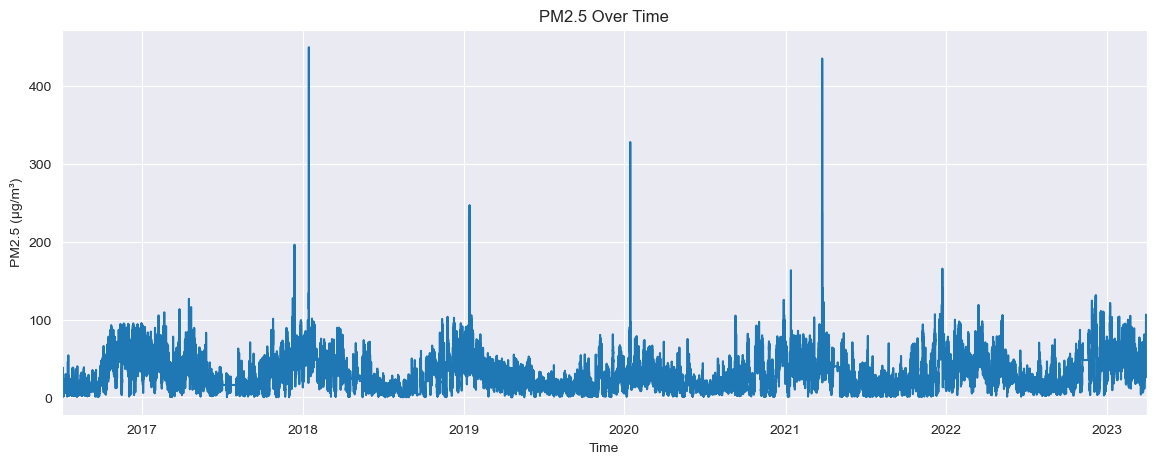

In [13]:
plt.figure(figsize=(14,5))
air['PM2.5 (ug/m3)'].plot()
plt.title('PM2.5 Over Time')
plt.xlabel('Time')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.show()


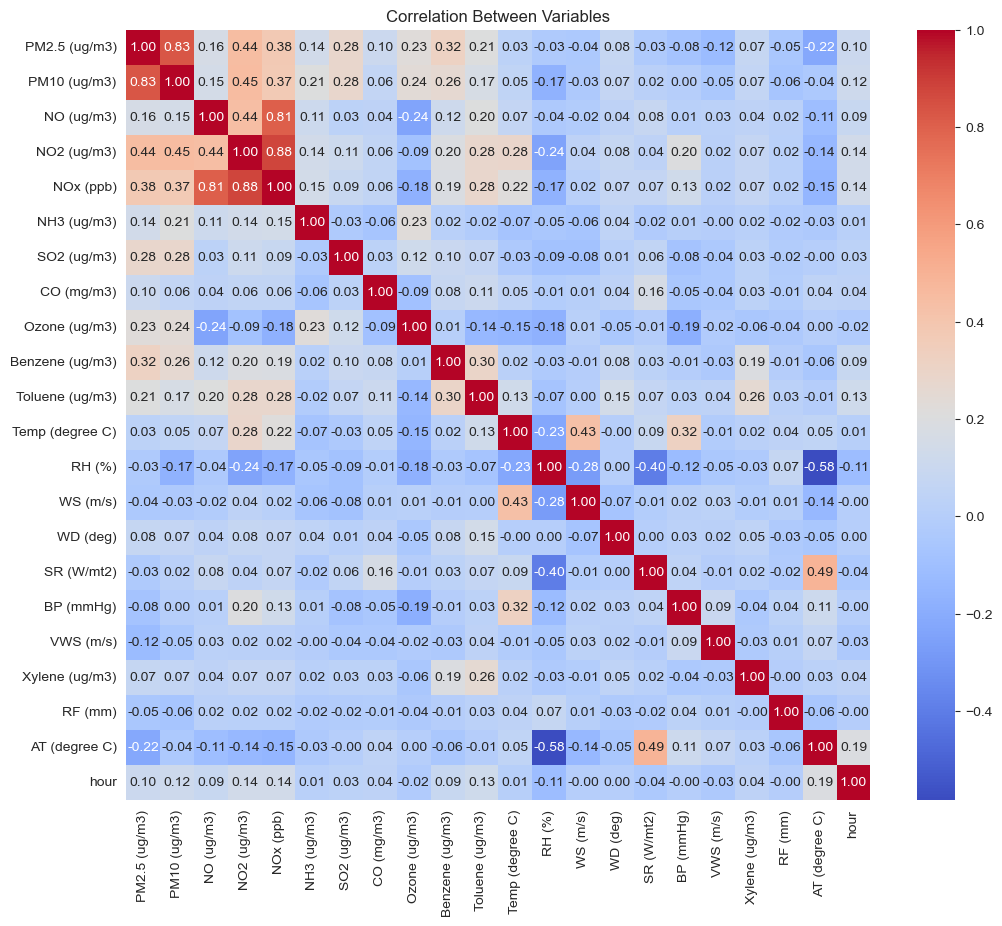

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(air.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Between Variables')
plt.show()


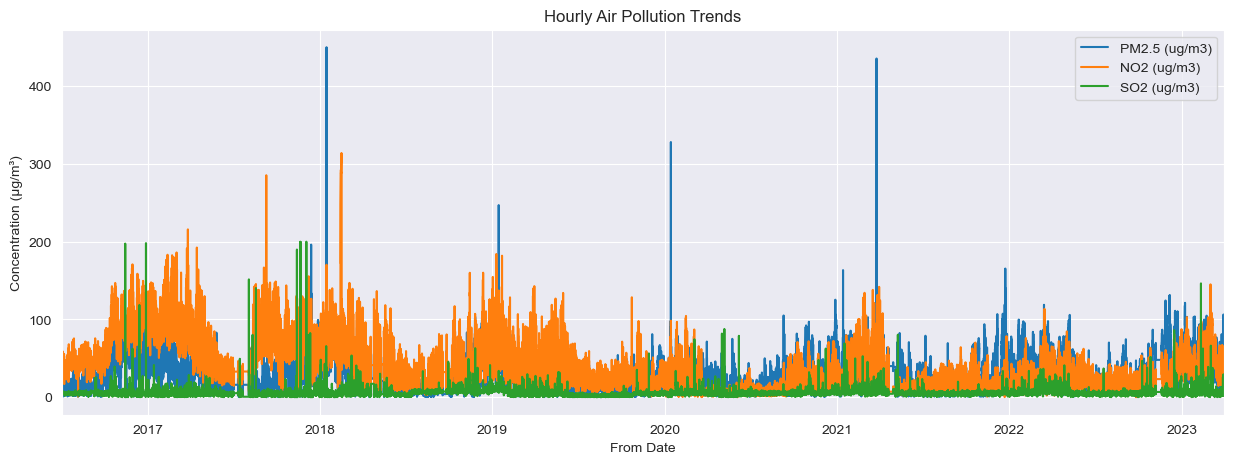

In [15]:
air[['PM2.5 (ug/m3)', 'NO2 (ug/m3)', 'SO2 (ug/m3)']].plot(figsize=(15,5))
plt.title('Hourly Air Pollution Trends')
plt.ylabel('Concentration (µg/m³)')
plt.grid(True)
plt.show()



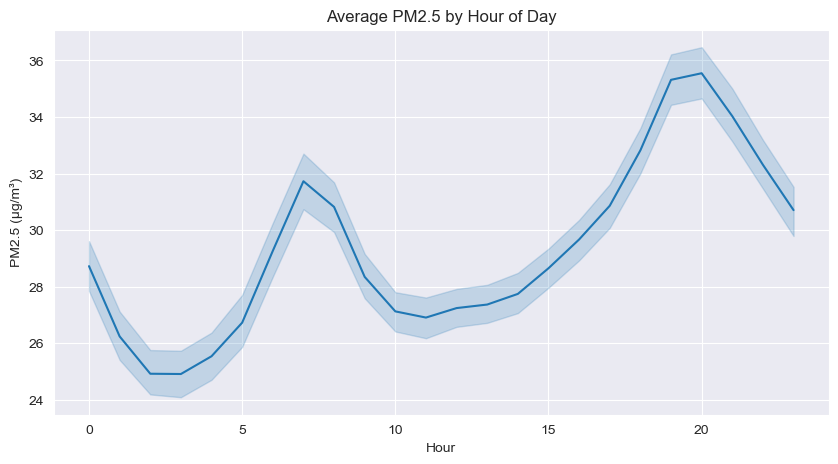

In [16]:
air['hour'] = air.index.hour

plt.figure(figsize=(10,5))
sns.lineplot(data=air, x='hour', y='PM2.5 (ug/m3)')
plt.title('Average PM2.5 by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.show()


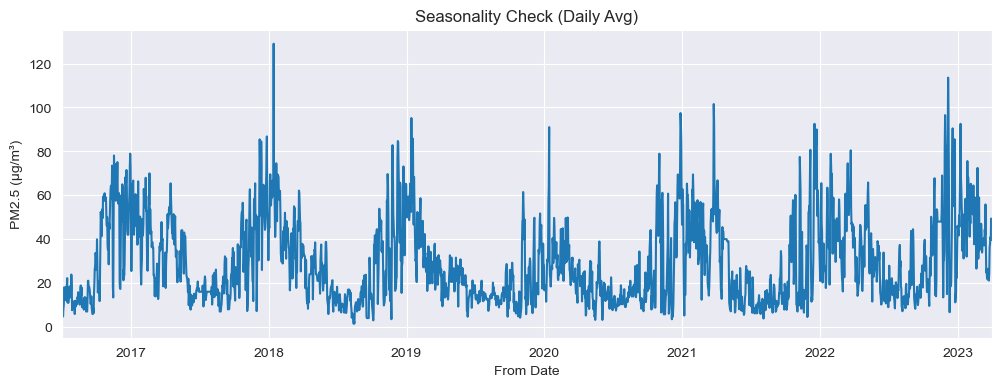

In [17]:
daily_avg = air['PM2.5 (ug/m3)'].resample('D').mean()
daily_avg.plot(figsize=(12, 4), title='Seasonality Check (Daily Avg)')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.show()


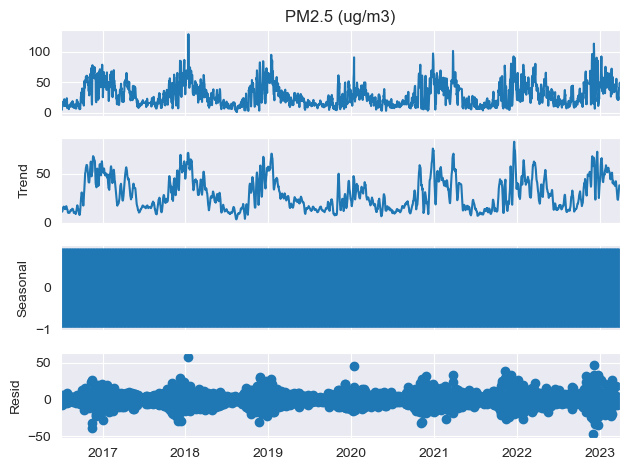

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Drop NA and use daily averages for cleaner signal
daily_avg = air['PM2.5 (ug/m3)'].dropna().resample('D').mean()
result = seasonal_decompose(daily_avg, model='additive')

result.plot()
plt.show()


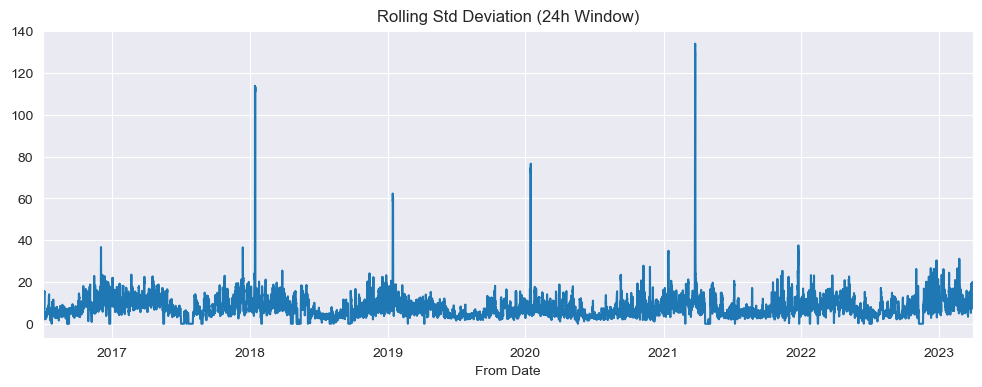

In [19]:
air['PM2.5 (ug/m3)'].rolling(24).std().plot(figsize=(12,4), title='Rolling Std Deviation (24h Window)')
plt.grid(True)
plt.show()


In [20]:
from statsmodels.tsa.stattools import adfuller

series = air['PM2.5 (ug/m3)'].dropna()
adf_result = adfuller(series)

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])


ADF Statistic: -13.266576397745588
p-value: 8.195584459607478e-25


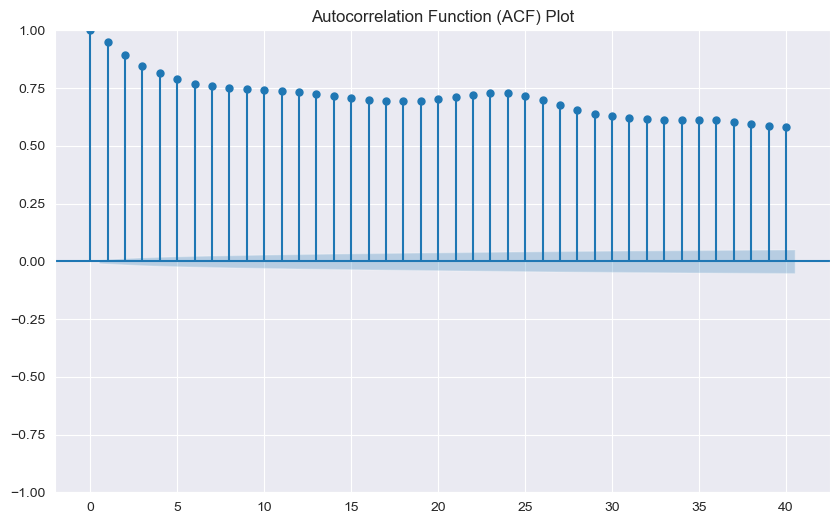

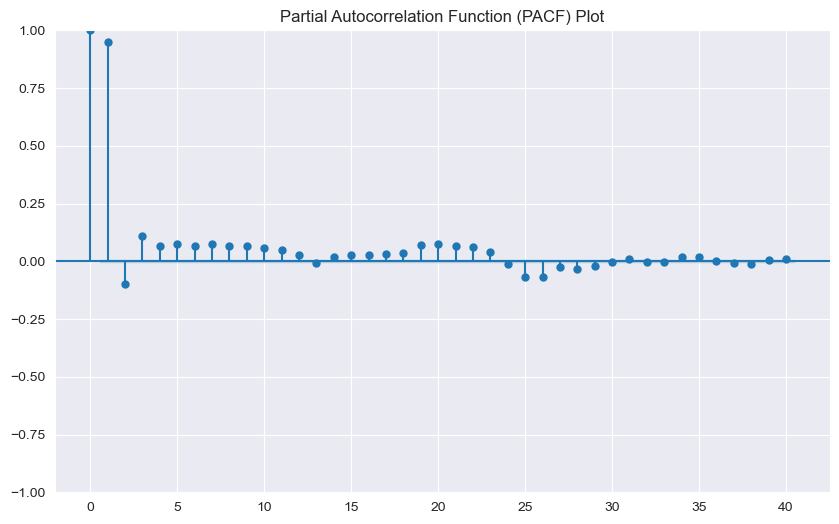

In [21]:
# ACF Plot
plt.figure(figsize=(10, 6))
plot_acf(air["PM2.5 (ug/m3)"], lags=40, ax=plt.gca())  # Hier 'pm2.5' anpassen, je nach der Spalte, die du analysierst
plt.title("Autocorrelation Function (ACF) Plot")
plt.show()

# PACF Plot
plt.figure(figsize=(10, 6))
plot_pacf(air["PM2.5 (ug/m3)"], lags=40, ax=plt.gca())  # Hier 'pm2.5' anpassen
plt.title("Partial Autocorrelation Function (PACF) Plot")
plt.show()

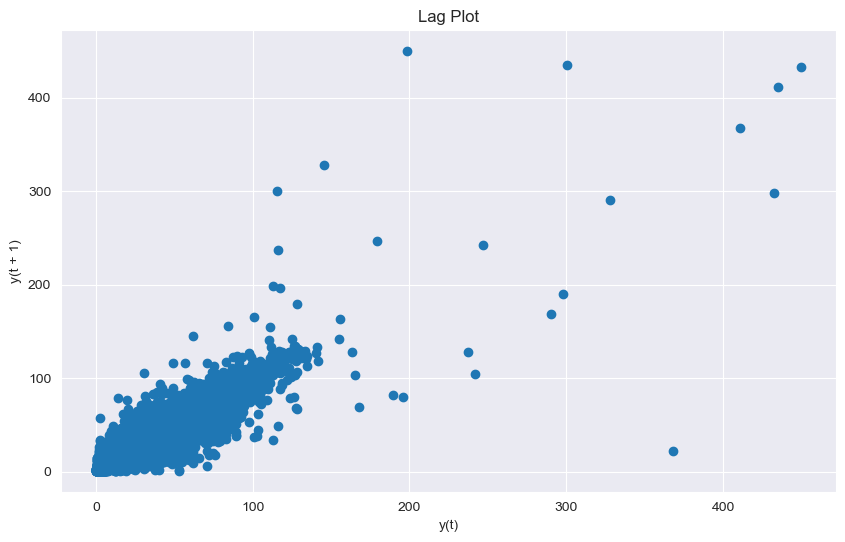

In [22]:
plt.figure(figsize=(10, 6))
lag_plot(air["PM2.5 (ug/m3)"], lag=1)  # Hier 'pm2.5' anpassen
plt.title("Lag Plot")
plt.show()

Lets build our SARIMA 

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


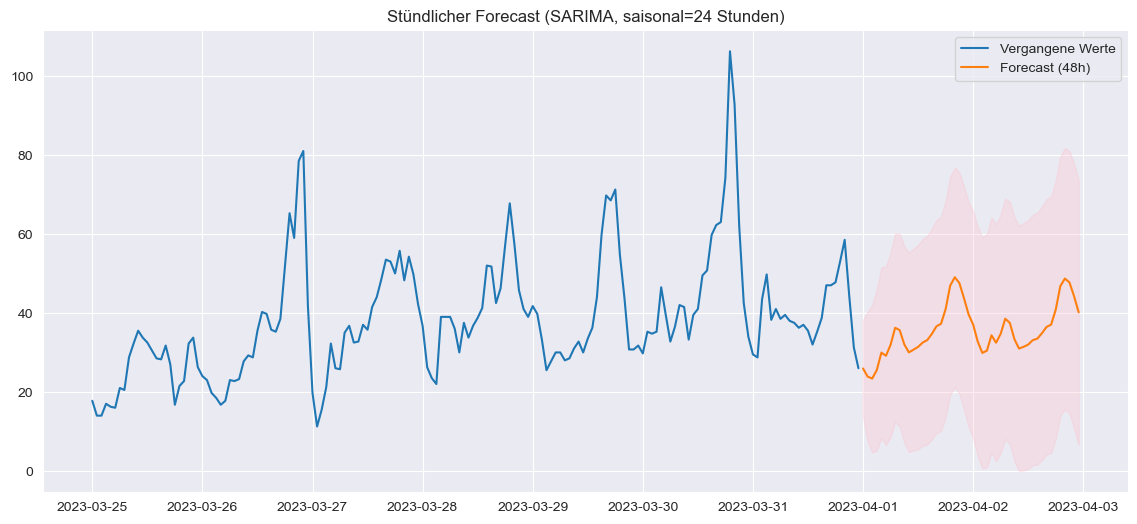

In [23]:
# Beispiel: nehme nur die Spalte 'pm2.5'
data = air['PM2.5 (ug/m3)']

# Schritt 1: Resample auf stündliche Mittelwerte (falls noch nicht gemacht)
# air = air.resample('H').mean()

# Schritt 2: Lücken auffüllen
data = data.ffill()

# Schritt 3: SARIMA Modell trainieren
model = SARIMAX(data,
                order=(1,1,1),            # p,d,q
                seasonal_order=(1,1,1,24), # P,D,Q,s (s=24 für 24 Stunden Saisonalität)
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()

# Schritt 4: Forecast der nächsten 48 Stunden
forecast = results.get_forecast(steps=48)
forecast_ci = forecast.conf_int()

# Schritt 5: Plot
plt.figure(figsize=(14,6))
plt.plot(data[-7*24:], label='Vergangene Werte')  # letzte 7 Tage
plt.plot(forecast.predicted_mean, label='Forecast (48h)')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Stündlicher Forecast (SARIMA, saisonal=24 Stunden)')
plt.legend()
plt.show()
 

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


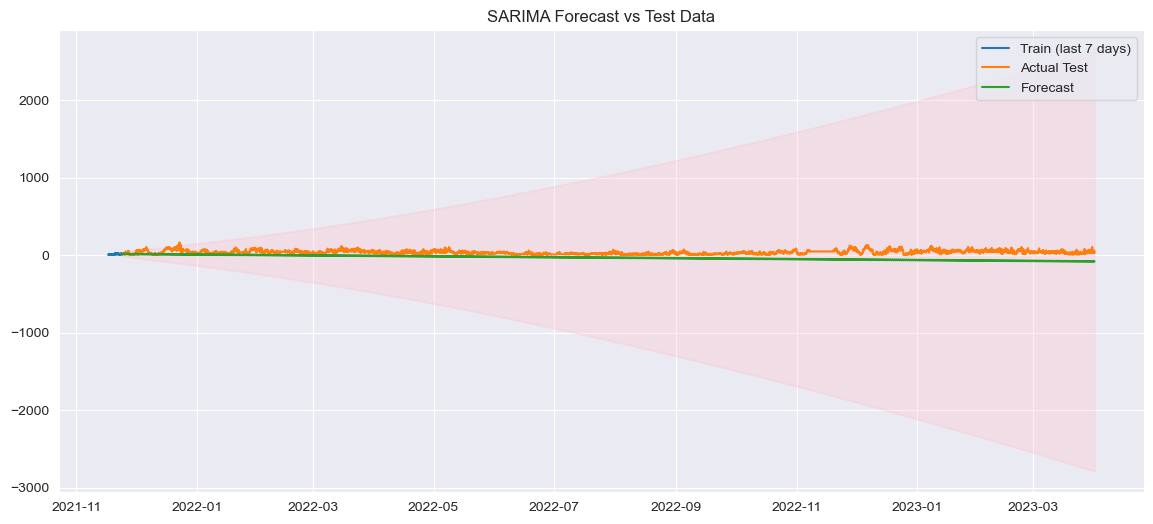

In [24]:
# 1. Load and clean the data
data = air['PM2.5 (ug/m3)']
data = data.ffill()

# 2. 80/20 Split
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# 3. Train SARIMA on training data
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train,
                order=(1,1,1),
                seasonal_order=(1,1,1,24),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()

# 4. Forecast on test set length
forecast = results.get_forecast(steps=len(test))
forecast_ci = forecast.conf_int()

# 5. Plot
plt.figure(figsize=(14,6))
plt.plot(train[-7*24:], label='Train (last 7 days)')
plt.plot(test, label='Actual Test')
plt.plot(forecast.predicted_mean, label='Forecast')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title('SARIMA Forecast vs Test Data')
plt.legend()
plt.show()


In [ ]:
# Schritt 1: Daten auf Tagesbasis umwandeln
daily_data = air['PM2.5 (ug/m3)'].resample('D').mean()
daily_data = daily_data.ffill()

# Schritt 2: SARIMA Modell auf Tagesdaten
model_year = SARIMAX(daily_data,
                     order=(1,1,1),
                     seasonal_order=(1,1,1,365),
                     enforce_stationarity=False,
                     enforce_invertibility=False)
results_year = model_year.fit()

# Schritt 3: Forecast der nächsten 365 Tage
forecast_year = results_year.get_forecast(steps=365)
forecast_ci_year = forecast_year.conf_int()

# Schritt 4: Plot
plt.figure(figsize=(14,6))
plt.plot(daily_data[-365:], label='Vergangene Werte')  # letztes Jahr
plt.plot(forecast_year.predicted_mean, label='Forecast (1 Jahr)')
plt.fill_between(forecast_ci_year.index, forecast_ci_year.iloc[:, 0], forecast_ci_year.iloc[:, 1], color='lightblue', alpha=0.3)
plt.title('Jahres-Forecast (SARIMA, saisonal=365 Tage)')
plt.legend()
plt.show()
